# Diabetes Prediction

## Importing Dataset and libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
path = "D:\Document\Programming\Software\Python\Projects\Project-3\Dataset\diabetes.csv"
df = pd.read_csv(path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Preprocessing

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
#### Checking Missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Minimum vale of Glucose, Blood pressure. SkinThickness,Insulin,BMI cannot be zero
- Replace the zero value with the mean value of the dataset

In [90]:
def preprocessing(df):
    for col in df.columns:
        if df[col].min() == 0:  # Check if the minimum value in the column is 0
            col_mean = df[col].mean()  # Calculate the mean of the column
            df[col] = df[col].replace(0, col_mean)  # Replace 0 with the mean
    return df

In [91]:
# Independent and Dependent Data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X = preprocessing(X)
df = pd.concat([X,y],axis=1)
df.to_csv("D:\Document\Programming\Software\Python\Projects\Project-3\Dataset\Diabetes_cleaned0.csv",index=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [92]:
df.min()

Pregnancies                  1.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [93]:
Dpath = "D:\Document\Programming\Software\Python\Projects\Project-3\Dataset\diabetes_cleaned1.csv"
export1 = df.to_csv(Dpath,index=False)

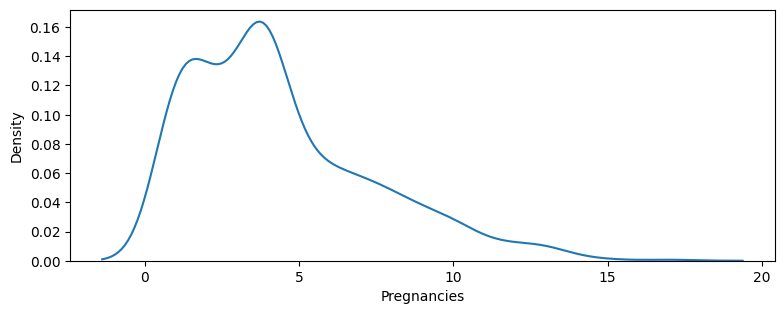

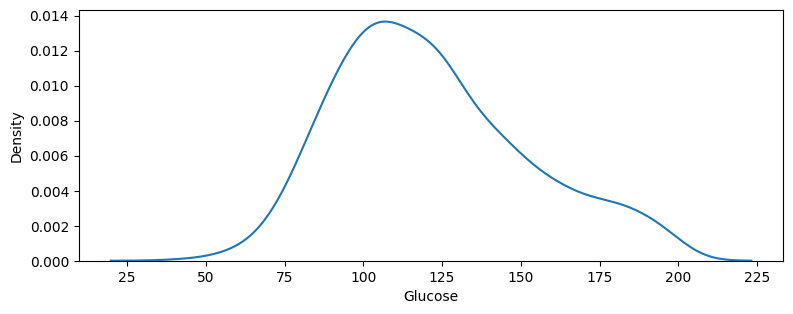

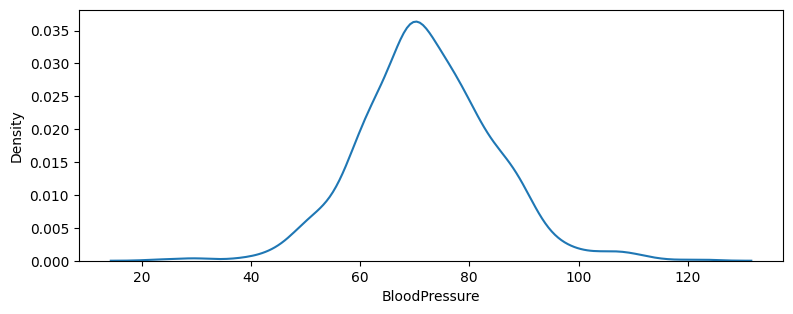

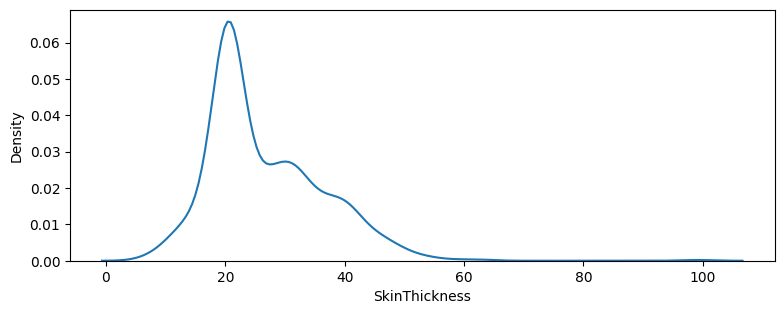

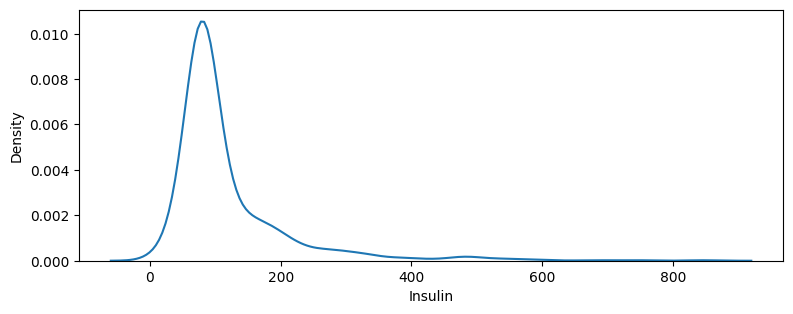

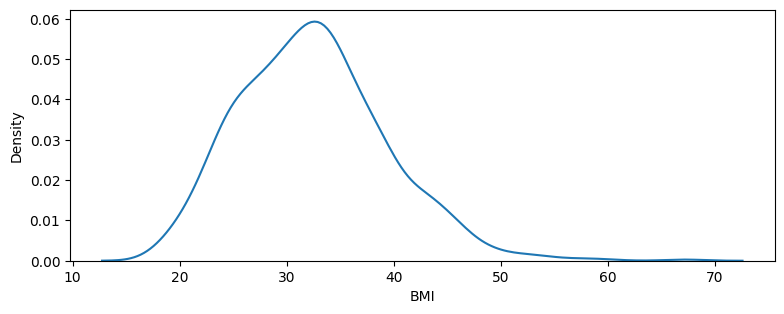

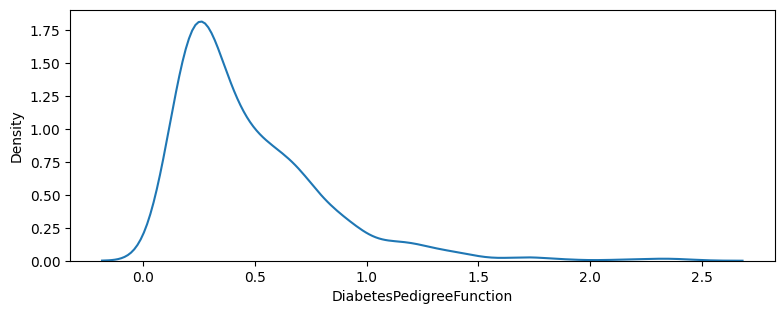

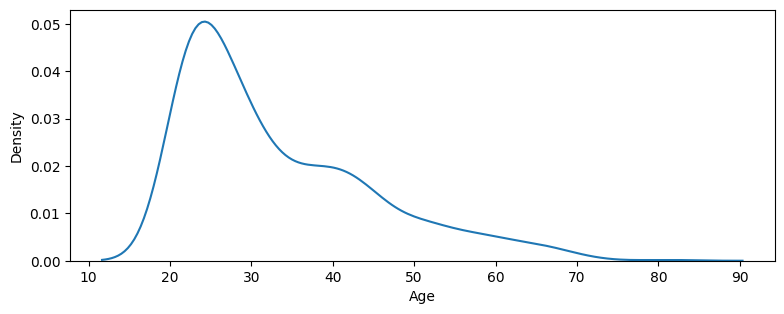

In [143]:
for i, col in enumerate(X.columns) :
    plt.figure(figsize=(20,15))
    plt.subplot(4,2,i+1)
    sns.kdeplot(X[col])

In [6]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [119]:
y[y==0].value_counts()

Outcome
0    500
Name: count, dtype: int64

In [120]:
y[y==1].value_counts()

Outcome
1    268
Name: count, dtype: int64

### Balancing the Imbalanced dataset using SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [69]:
X.shape

(768, 8)

In [70]:
y.shape

(768,)

In [46]:
print(y[y==0].value_counts())
print(y[y==1].value_counts())

Outcome
0    500
Name: count, dtype: int64
Outcome
1    500
Name: count, dtype: int64


### Balanced Dataset

In [71]:
data = pd.concat([X,y],axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


## EDA

In [72]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## Feature Selection

#### Correlation Plot

<Axes: >

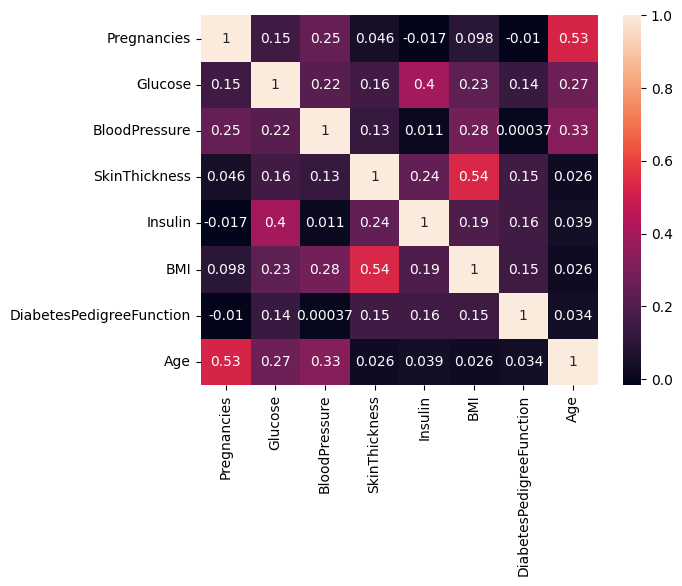

In [73]:
sns.heatmap(X.corr(),annot=True)

In [74]:
def feature_selection(dataset,threshold):
    feature = set()
    df = dataset.iloc[:,:-1]
    df_corr = df.corr()
    for i in range(len(df_corr.columns)):
        for j in range(i):
            if abs(df_corr.iloc[i,j]) >= threshold:
                colname = df_corr.columns[i]
                feature.add(colname)
    return feature
                

In [75]:
col_selection = feature_selection(X,0.85)
col_selection

set()

- None of the columns are highly correlated
- Therefore no columns can be removed

#### Histogram Plot

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

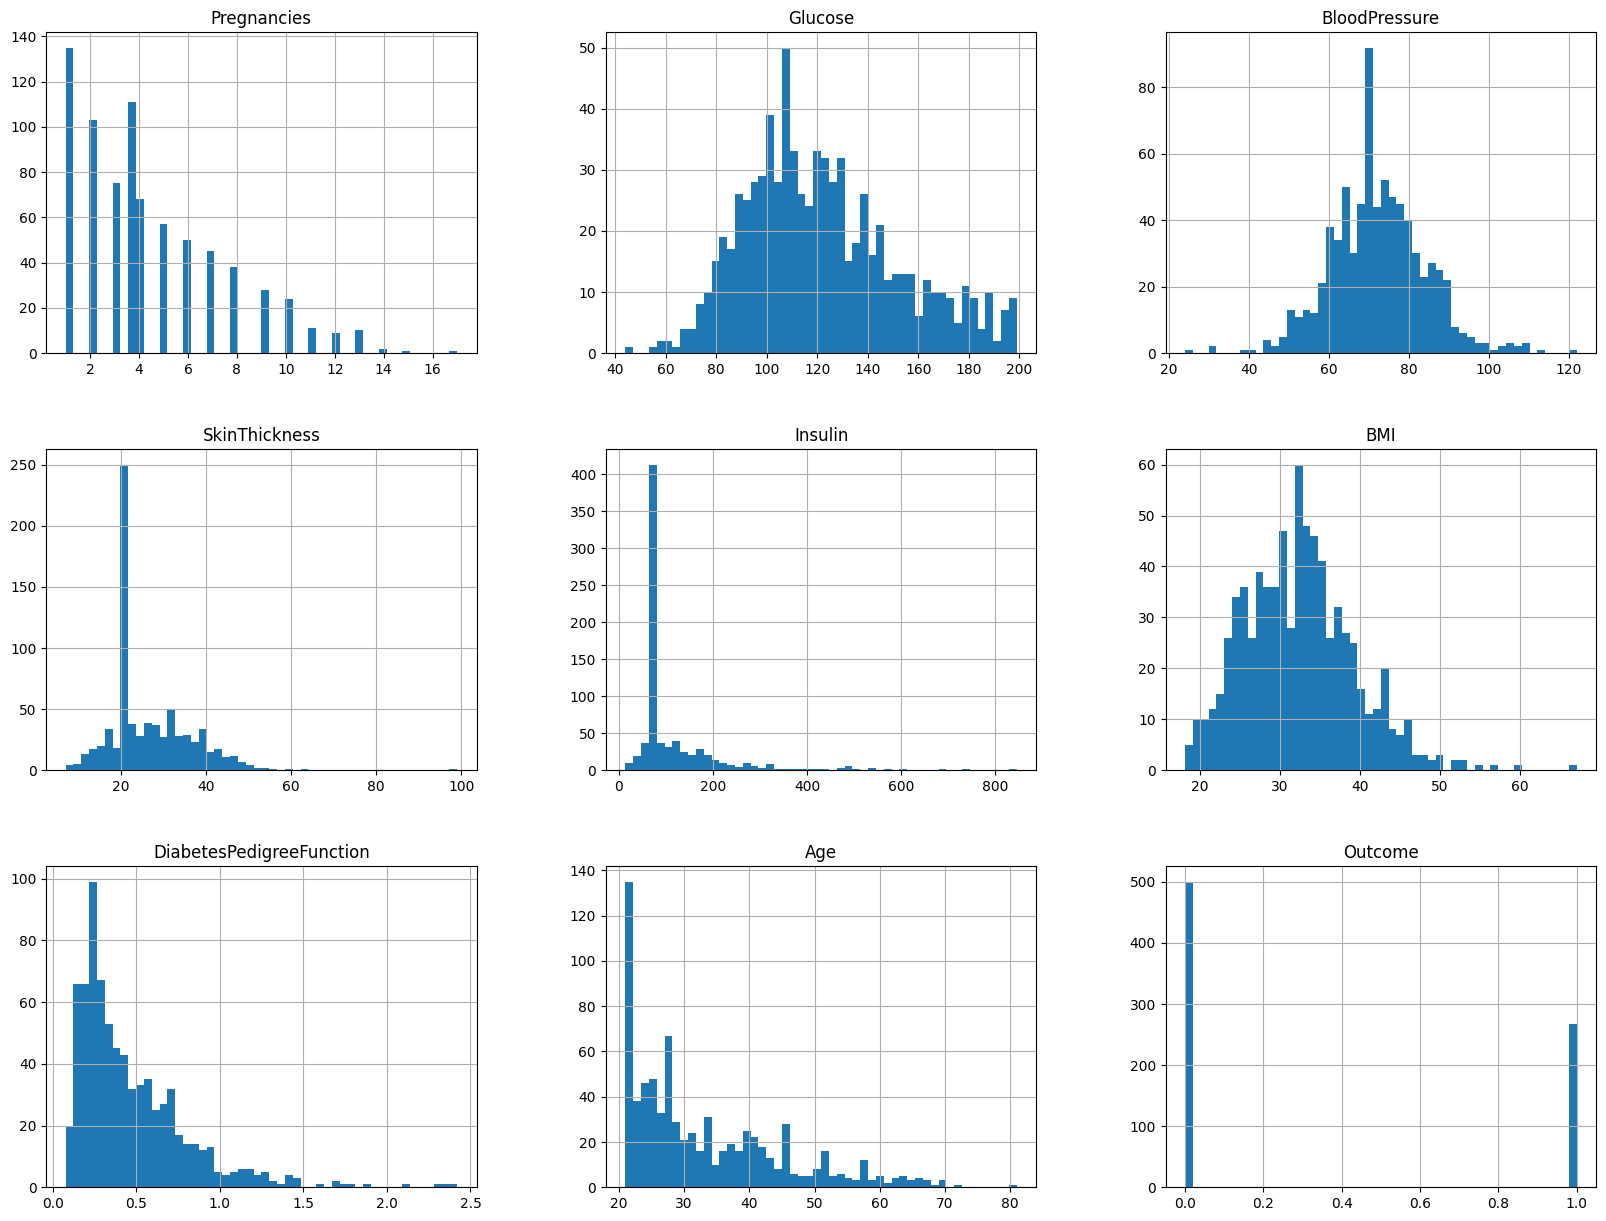

In [76]:
data.hist(bins=50,figsize=(20,15))


- Data Imbalance in the outcome has been mended

#### Box Plot

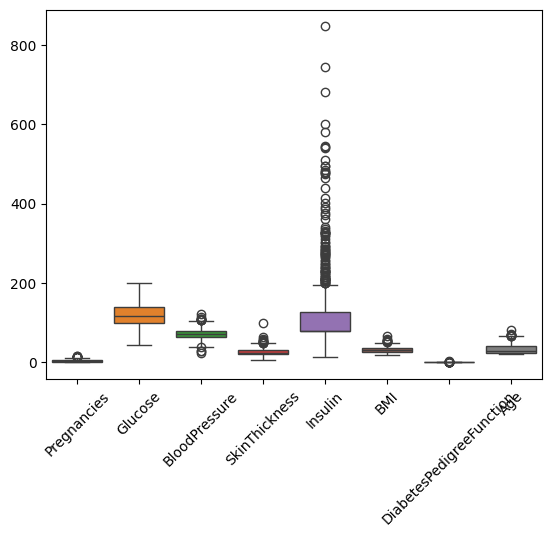

In [77]:
sns.boxplot(data=X)
plt.xticks(rotation = 45)
plt.show()

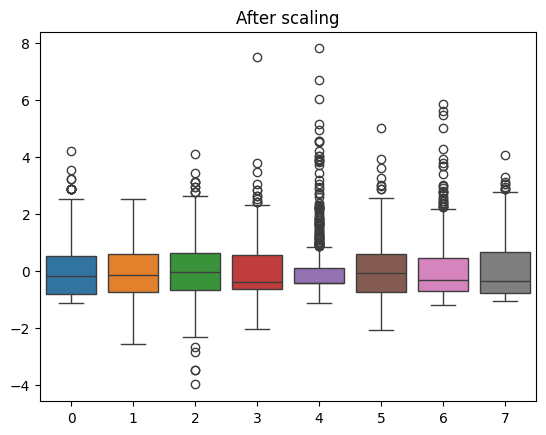

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sns.boxplot(data=X_scaled)
plt.title("After scaling")

X_scaled_df = pd.DataFrame(X_scaled,columns = X.columns)

- Presence of excessive outliners in the dataset, sepecially in the Insulin column

##### Handling Outliers of the dataset

In [79]:
# Calculate Q1, Q3, and IQR
Q1 = X_scaled_df.quantile(0.25)  # First quartile (25th percentile)
Q3 = X_scaled_df.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1          # Interquartile range

In [80]:
Upper_bound = Q3 + 1.5 * IQR
Lower_bound = Q1 - 1.5 * IQR

In [81]:
print("Lower Bound:\n", Lower_bound)
print("Upper Bound:\n", Upper_bound)

Lower Bound:
 Pregnancies                -2.816958
Glucose                    -2.718342
BloodPressure              -2.663916
SkinThickness              -2.417185
Insulin                    -1.182937
BMI                        -2.707188
DiabetesPedigreeFunction   -2.421762
Age                        -2.956024
dtype: float64
Upper Bound:
 Pregnancies                 2.548176
Glucose                     2.607769
BloodPressure               2.621827
SkinThickness               2.346899
Insulin                     0.857513
BMI                         2.590520
DiabetesPedigreeFunction    2.199020
Age                         2.829943
dtype: float64


In [82]:
for col_name in X_scaled_df.columns:
    X_scaled_df[col_name] = X_scaled_df[col_name].where(
        (X_scaled_df[col_name] >= Lower_bound[col_name]) & (X_scaled_df[col_name] <= Upper_bound[col_name]),
        other=X_scaled_df[col_name].mean()
    )

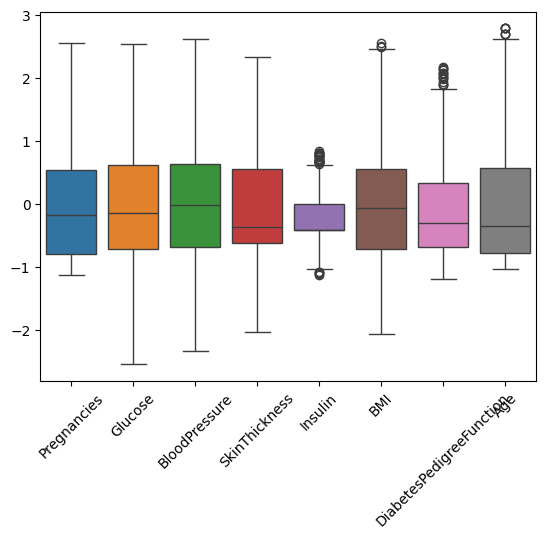

In [83]:
sns.boxplot(data=X_scaled_df)
plt.xticks(rotation = 45)
plt.show()

-  Decrease in outliners using IQR

#### Pie Chart

In [84]:
percentage = y.value_counts()/y.value_counts().sum() * 100
percentage

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

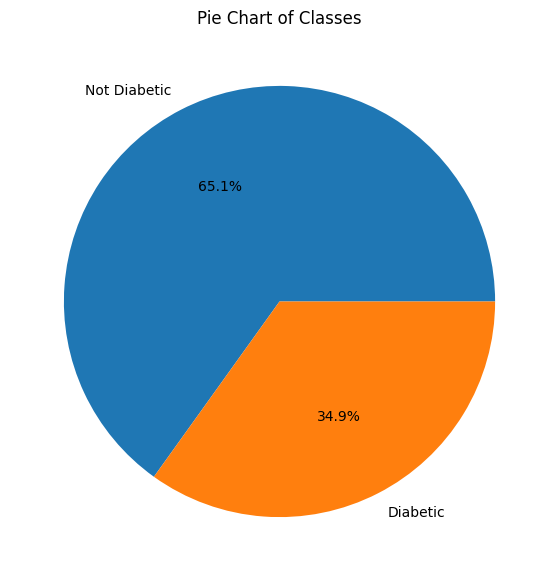

In [85]:
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=['Not Diabetic','Diabetic'],autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

- Balanced the clases using SMOT

## Exporting CSV

In [64]:
data2 = pd.concat([X_scaled_df, y], axis=1).reset_index(drop=True)

In [86]:
data3 = pd.concat([X_scaled_df, y], axis=1).reset_index(drop=True)

In [65]:
Dpath = "D:\Document\Programming\Software\Python\Projects\Project-3\Dataset\diabetes_cleaned.csv"
export = data.to_csv(Dpath,index=False)
Dpath = "D:\Document\Programming\Software\Python\Projects\Project-3\Dataset\diabetes_cleaned2.csv"
export2 = data2.to_csv(Dpath,index=False)

In [87]:
Dpath = "D:\Document\Programming\Software\Python\Projects\Project-3\Dataset\diabetes_cleaned3.csv"
export2 = data3.to_csv(Dpath,index=False)